In [ ]:
%tensorflow_version 1.x
import tensorflow
tensorflow.__version__

TensorFlow 1.x selected.


'1.15.2'

In [ ]:
!pip3 install -q pydicom 
!pip3 install -q tqdm 
!pip3 install -q imgaug

In [ ]:
import os 
import sys

import random
import math
import numpy as np
import cv2
import json
import pydicom
from imgaug import augmenters as iaa
from tqdm import tqdm
import glob

import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from matplotlib.patches import Rectangle
import seaborn as sns
import pydicom as dcm
%matplotlib inline
import cv2

import keras
import tensorflow as tf
import tensorflow.keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, ZeroPadding2D
from tensorflow.keras.applications import DenseNet201
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ROOT_DIR = '/content/drive/MyDrive/RSNA_PneumoniaDetectionChallenge'
# Directory to save logs and trained model
#MODEL_DIR = os.path.join(ROOT_DIR, 'logs')

In [ ]:
print(ROOT_DIR)
#print(MODEL_DIR)
os.chdir(ROOT_DIR)

/content/drive/MyDrive/RSNA_PneumoniaDetectionChallenge


In [ ]:
train_df = pd.read_csv('train_labels.csv')
test_df = pd.read_csv('test_labels.csv')

In [ ]:
'''
annot_df = pd.DataFrame()
annot_df['image_name'] = train_df['patientId'] + '.png'
annot_df['xmin'] = train_df['x']
annot_df['xmax'] = train_df['x'] + train_df['width']
annot_df['ymin'] = train_df['y']
annot_df['ymax'] = train_df['y'] + train_df['height']
annot_df['class_id'] = train_df['Target']
annot_df.to_csv('annotations_ssd.csv', index=False)
'''

"\nannot_df = pd.DataFrame()\nannot_df['image_name'] = train_df['patientId'] + '.png'\nannot_df['xmin'] = train_df['x']\nannot_df['xmax'] = train_df['x'] + train_df['width']\nannot_df['ymin'] = train_df['y']\nannot_df['ymax'] = train_df['y'] + train_df['height']\nannot_df['class_id'] = train_df['Target']\nannot_df.to_csv('annotations_ssd.csv', index=False)\n"

In [ ]:
'''
temp['xmax'] = temp['x'] + temp['width']
temp['ymax'] = temp['y'] + temp['height']
temp['xmin'] = temp['x']
temp['ymin'] = temp['y']
temp['width'] = 1024
temp['height'] = 1024
temp['class'] = temp['Target']
temp['filename'] = temp['patientId']

temp.head()

annot_df = pd.DataFrame()
annot_df['filename'] = temp['filename']
annot_df['width'] = temp['width']
annot_df['height'] = temp['height']
annot_df['class'] = temp['class']
annot_df['xmin'] = temp['xmin']
annot_df['ymin'] = temp['ymin']
annot_df['xmax'] = temp['xmax']
annot_df['ymax'] = temp['ymax']

annot_df.head()

annot_df.to_csv('annotations.csv', index = False)

with open("train.txt", "w") as output:
    output.write(str(paths))

os.chdir('PNG_Train/')
ls = os.listdir()

len(ls)
with open("list1.csv", "w") as output:
    output.write(str(ls))

ls1 = pd.DataFrame(ls)
ls1.head()
ls1.to_csv('list2.csv', index = False)
'''

'\ntemp[\'xmax\'] = temp[\'x\'] + temp[\'width\']\ntemp[\'ymax\'] = temp[\'y\'] + temp[\'height\']\ntemp[\'xmin\'] = temp[\'x\']\ntemp[\'ymin\'] = temp[\'y\']\ntemp[\'width\'] = 1024\ntemp[\'height\'] = 1024\ntemp[\'class\'] = temp[\'Target\']\ntemp[\'filename\'] = temp[\'patientId\']\n\ntemp.head()\n\nannot_df = pd.DataFrame()\nannot_df[\'filename\'] = temp[\'filename\']\nannot_df[\'width\'] = temp[\'width\']\nannot_df[\'height\'] = temp[\'height\']\nannot_df[\'class\'] = temp[\'class\']\nannot_df[\'xmin\'] = temp[\'xmin\']\nannot_df[\'ymin\'] = temp[\'ymin\']\nannot_df[\'xmax\'] = temp[\'xmax\']\nannot_df[\'ymax\'] = temp[\'ymax\']\n\nannot_df.head()\n\nannot_df.to_csv(\'annotations.csv\', index = False)\n\nwith open("train.txt", "w") as output:\n    output.write(str(paths))\n\nos.chdir(\'PNG_Train/\')\nls = os.listdir()\n\nlen(ls)\nwith open("list1.csv", "w") as output:\n    output.write(str(ls))\n\nls1 = pd.DataFrame(ls)\nls1.head()\nls1.to_csv(\'list2.csv\', index = False)\n'

In [ ]:
'''
os.chdir(ROOT_DIR)
#!git clone https://github.com/balancap/SSD-Tensorflow.git
!git clone https://github.com/pierluigiferrari/ssd_keras.git
#os.chdir('ssd_keras')
'''

"\nos.chdir(ROOT_DIR)\n#!git clone https://github.com/balancap/SSD-Tensorflow.git\n!git clone https://github.com/pierluigiferrari/ssd_keras.git\n#os.chdir('ssd_keras')\n"

In [ ]:
# Import important libraries 
sys.path.append(os.path.join(ROOT_DIR, 'ssd_keras'))  # To find local version of the library
from models import keras_ssd300
import keras_layers
import keras_loss_function
import ssd_encoder_decoder
from ssd_keras import *

In [ ]:
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TerminateOnNaN, CSVLogger
from keras import backend as K
from keras.models import load_model
from math import ceil
import numpy as np
from matplotlib import pyplot as plt

from models.keras_ssd300 import ssd_300
from keras_loss_function.keras_ssd_loss import SSDLoss
from keras_layers.keras_layer_AnchorBoxes import AnchorBoxes
from keras_layers.keras_layer_DecodeDetections import DecodeDetections
from keras_layers.keras_layer_DecodeDetectionsFast import DecodeDetectionsFast
from keras_layers.keras_layer_L2Normalization import L2Normalization

from ssd_encoder_decoder.ssd_input_encoder import SSDInputEncoder
from ssd_encoder_decoder.ssd_output_decoder import decode_detections, decode_detections_fast

from data_generator.object_detection_2d_data_generator import DataGenerator
from data_generator.object_detection_2d_geometric_ops import Resize
from data_generator.object_detection_2d_photometric_ops import ConvertTo3Channels
from data_generator.data_augmentation_chain_original_ssd import SSDDataAugmentation
from data_generator.object_detection_2d_misc_utils import apply_inverse_transforms

%matplotlib inline

In [ ]:
model = keras_ssd300.ssd_300(image_size =(300, 300, 3), n_classes = 2, mode = 'training', min_scale=0.2, max_scale=0.95)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

tracking <tf.Variable 'conv4_3_norm/conv4_3_norm_gamma:0' shape=(512,) dtype=float32> gamma


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
identity_layer (Lambda)         (None, 300, 300, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
input_mean_normalization (Lambd (None, 300, 300, 3)  0           identity_layer[0][0]             
__________________________________________________________________________________________________
input_channel_swap (Lambda)     (None, 300, 300, 3)  0           input_mean_normalization[0][0]   
____________________________________________________________________________________________

In [ ]:
img_height = 300 # Height of the model input images
img_width = 300 # Width of the model input images
img_channels = 3 # Number of color channels of the model input images
mean_color = [123, 117, 104] # The per-channel mean of the images in the dataset. Do not change this value if you're using any of the pre-trained weights.
swap_channels = [2, 1, 0] # The color channel order in the original SSD is BGR, so we'll have the model reverse the color channel order of the input images.
n_classes = 2 # Number of positive classes, e.g. 20 for Pascal VOC, 80 for MS COCO
scales_pascal = [0.1, 0.2, 0.37, 0.54, 0.71, 0.88, 1.05] # The anchor box scaling factors used in the original SSD300 for the Pascal VOC datasets
scales_coco = [0.07, 0.15, 0.33, 0.51, 0.69, 0.87, 1.05] # The anchor box scaling factors used in the original SSD300 for the MS COCO datasets
scales = scales_pascal
aspect_ratios = [[1.0, 2.0, 0.5],
                 [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                 [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                 [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                 [1.0, 2.0, 0.5],
                 [1.0, 2.0, 0.5]] # The anchor box aspect ratios used in the original SSD300; the order matters
two_boxes_for_ar1 = True
steps = [8, 16, 32, 64, 100, 300] # The space between two adjacent anchor box center points for each predictor layer.
offsets = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5] # The offsets of the first anchor box center points from the top and left borders of the image as a fraction of the step size for each predictor layer.
clip_boxes = False # Whether or not to clip the anchor boxes to lie entirely within the image boundaries
variances = [0.1, 0.1, 0.2, 0.2] # The variances by which the encoded target coordinates are divided as in the original implementation
normalize_coords = True

In [ ]:
# 2: Load some weights into the model.

# TODO: Set the path to the weights you want to load.
weights_path = 'ssd_keras/examples/VGG_ILSVRC_16_layers_fc_reduced.h5'

model.load_weights(weights_path, by_name=True)

# 3: Instantiate an optimizer and the SSD loss function and compile the model.
#    If you want to follow the original Caffe implementation, use the preset SGD
#    optimizer, otherwise I'd recommend the commented-out Adam optimizer.

#adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
sgd = SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=False)

ssd_loss = SSDLoss(neg_pos_ratio=3, alpha=1.0)

model.compile(optimizer=sgd, loss=ssd_loss.compute_loss)


Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.


In [ ]:
os.chdir('/content/drive/My Drive/RSNA_PneumoniaDetectionChallenge/')
%pwd

'/content/drive/My Drive/RSNA_PneumoniaDetectionChallenge'

In [ ]:
# 1: Instantiate two `DataGenerator` objects: One for training, one for validation.

# Optional: If you have enough memory, consider loading the images into memory for the reasons explained above.

train_dataset = DataGenerator(load_images_into_memory=False, hdf5_dataset_path=None)
val_dataset = DataGenerator(load_images_into_memory=False, hdf5_dataset_path=None)

# 2: Parse the image and label lists for the training and validation datasets. This can take a while.

# TODO: Set the paths to the datasets here.

# The directories that contain the images.
img_directory      = 'PNG_Train/'

# The directories that contain the annotations.
annots_dir = 'annotations_ssd.csv'

# The paths to the image sets.
filepaths = 'train.txt'

# The XML parser needs to now what object class names to look for and in which order to map them to integers.
classes = ['0', '1']

train_dataset.parse_csv(images_dir=img_directory,
                        labels_filename = annots_dir,
                        input_format = ['image_name', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id'],
                        random_sample=False,
                        include_classes='all',
                        ret=False,
                        verbose=False)

val_dataset.parse_csv(images_dir=img_directory,
                        labels_filename = annots_dir,
                        input_format = ['image_name', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id'],
                        random_sample=False,
                        include_classes='all',
                        ret=False,
                        verbose=False)

In [ ]:
# Optional: Convert the dataset into an HDF5 dataset. This will require more disk space, but will
# speed up the training. Doing this is not relevant in case you activated the `load_images_into_memory`
# option in the constructor, because in that cas the images are in memory already anyway. If you don't
# want to create HDF5 datasets, comment out the subsequent two function calls.
'''
train_dataset.create_hdf5_dataset(file_path='dataset_pneumoniadetection_trainval.h5',
                                  resize=False,
                                  variable_image_size=True,
                                  verbose=True)
'''
'''
val_dataset.create_hdf5_dataset(file_path='dataset_pascal_voc_07_test.h5',
                                resize=False,
                                variable_image_size=True,
                                verbose=True)
'''              
                

"\nval_dataset.create_hdf5_dataset(file_path='dataset_pascal_voc_07_test.h5',\n                                resize=False,\n                                variable_image_size=True,\n                                verbose=True)\n"

In [ ]:
%pwd

'/content/drive/My Drive/RSNA_PneumoniaDetectionChallenge'

In [ ]:
# 3: Set the batch size.

batch_size = 32 # Change the batch size if you like, or if you run into GPU memory issues.

# 4: Set the image transformations for pre-processing and data augmentation options.

# For the training generator:
ssd_data_augmentation = SSDDataAugmentation(img_height=img_height,
                                            img_width=img_width,
                                            background=mean_color)

# For the validation generator:
convert_to_3_channels = ConvertTo3Channels()
resize = Resize(height=img_height, width=img_width)

# 5: Instantiate an encoder that can encode ground truth labels into the format needed by the SSD loss function.

# The encoder constructor needs the spatial dimensions of the model's predictor layers to create the anchor boxes.
predictor_sizes = [model.get_layer('conv4_3_norm_mbox_conf').output_shape[1:3],
                   model.get_layer('fc7_mbox_conf').output_shape[1:3],
                   model.get_layer('conv6_2_mbox_conf').output_shape[1:3],
                   model.get_layer('conv7_2_mbox_conf').output_shape[1:3],
                   model.get_layer('conv8_2_mbox_conf').output_shape[1:3],
                   model.get_layer('conv9_2_mbox_conf').output_shape[1:3]]

ssd_input_encoder = SSDInputEncoder(img_height=img_height,
                                    img_width=img_width,
                                    n_classes=n_classes,
                                    predictor_sizes=predictor_sizes,
                                    scales=scales,
                                    aspect_ratios_per_layer=aspect_ratios,
                                    two_boxes_for_ar1=two_boxes_for_ar1,
                                    steps=steps,
                                    offsets=offsets,
                                    clip_boxes=clip_boxes,
                                    variances=variances,
                                    matching_type='multi',
                                    pos_iou_threshold=0.5,
                                    neg_iou_limit=0.5,
                                    normalize_coords=normalize_coords)

# 6: Create the generator handles that will be passed to Keras' `fit_generator()` function.

train_generator = train_dataset.generate(batch_size=batch_size,
                                         shuffle=True,
                                         transformations=[ssd_data_augmentation],
                                         label_encoder=ssd_input_encoder,
                                         returns={'processed_images',
                                                  'encoded_labels'},
                                         keep_images_without_gt=False)



val_generator = val_dataset.generate(batch_size=batch_size,
                                     shuffle=False,
                                     transformations=[convert_to_3_channels,
                                                      resize],
                                     label_encoder=ssd_input_encoder,
                                     returns={'processed_images',
                                              'encoded_labels'},
                                     keep_images_without_gt=False)


# Get the number of samples in the training and validations datasets.
train_dataset_size = train_dataset.get_dataset_size()
val_dataset_size   = val_dataset.get_dataset_size()

print("Number of images in the training dataset:\t{:>6}".format(train_dataset_size))
print("Number of images in the validation dataset:\t{:>6}".format(val_dataset_size))

Number of images in the training dataset:	 22152
Number of images in the validation dataset:	 22152


In [ ]:
# Define a learning rate schedule.

def lr_schedule(epoch):
    if epoch < 80:
        return 0.001
    elif epoch < 100:
        return 0.0001
    else:
        return 0.00001

In [ ]:
# Define model callbacks.
#filepath='ssd300_pascal_07+12_epoch-{epoch:02d}_loss-{loss:.4f}_val_loss-{val_loss:.4f}.h5',
# TODO: Set the filepath under which you want to save the model.
model_checkpoint = ModelCheckpoint(filepath='ssd300_pneumonia_epoch-{epoch:02d}_loss-{loss:.4f}.h5',
                                   monitor='loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)
#model_checkpoint.best = 

csv_logger = CSVLogger(filename='ssd300_pneumonia_training_log.csv',
                       separator=',',
                       append=True)

learning_rate_scheduler = LearningRateScheduler(schedule=lr_schedule,
                                                verbose=1)

terminate_on_nan = TerminateOnNaN()

callbacks = [model_checkpoint,
             csv_logger,
             learning_rate_scheduler]
             #terminate_on_nan]

In [ ]:
# If you're resuming a previous training, set `initial_epoch` and `final_epoch` accordingly.
initial_epoch   = 0
final_epoch     = 5
steps_per_epoch = 150

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=final_epoch,
                              callbacks=callbacks,
                              initial_epoch=initial_epoch,
                              #validation_data=val_generator,
                              #validation_steps=ceil(val_dataset_size/1000),
                              use_multiprocessing=True,
                              workers =2)                             


Epoch 1/5


/tensorflow-1.15.2/python3.7/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'



Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
150/150 [==============================] - 1038s 7s/step - loss: 6.9330

Epoch 00001: loss improved from inf to 6.93298, saving model to ssd300_pneumonia_epoch-01_loss-6.9330.h5
Epoch 2/5

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
150/150 [==============================] - 1014s 7s/step - loss: 6.2162

Epoch 00002: loss improved from 6.93298 to 6.21617, saving model to ssd300_pneumonia_epoch-02_loss-6.2162.h5
Epoch 3/5

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
150/150 [==============================] - 1008s 7s/step - loss: 6.1432

Epoch 00003: loss improved from 6.21617 to 6.14323, saving model to ssd300_pneumonia_epoch-03_loss-6.1432.h5
Epoch 4/5

Epoch 00004: LearningRateScheduler setting learning rate to 0.001.
150/150 [==============================] - 1006s 7s/step - loss: 6.0405

Epoch 00004: loss improved from 6.14323 to 6.04051, saving model to ssd300_pneumoni

Predictions on validation set

In [ ]:
# 1: Set the generator for the predictions.

predict_generator = val_dataset.generate(batch_size=1,
                                         shuffle=True,
                                         transformations=[convert_to_3_channels,
                                                          resize],
                                         label_encoder=None,
                                         returns={'processed_images',
                                                  'filenames',
                                                  'inverse_transform',
                                                  'original_images',
                                                  'original_labels'},
                                         keep_images_without_gt=False)

In [ ]:
%pwd
os.chdir('/content/drive/MyDrive/RSNA_PneumoniaDetectionChallenge/')

In [ ]:
# 2: Generate samples.

batch_images, batch_filenames, batch_inverse_transforms, batch_original_images, batch_original_labels = next(predict_generator)

i = 0 # Which batch item to look at

print("Image:", batch_filenames[i])
print()
print("Ground truth boxes:\n")
print(np.array(batch_original_labels[i]))

Image: PNG_Train/15cdd2b4-0fb2-482c-92ac-a640e94eccba.png

Ground truth boxes:

[[  1 550 144 799 810]]


In [ ]:
# TODO: Set the path to the `.h5` file of the model to be loaded.
model_path = 'ssd300_pneumonia_epoch-04_loss-6.0405.h5'

# We need to create an SSDLoss object in order to pass that to the model loader.
ssd_loss = SSDLoss(neg_pos_ratio=3, n_neg_min=0, alpha=1.0)

#K.clear_session() # Clear previous models from memory.

model = load_model(model_path, custom_objects={'AnchorBoxes': AnchorBoxes,
                                               'L2Normalization': L2Normalization,
                                               'DecodeDetections': DecodeDetections,
                                               'compute_loss': ssd_loss.compute_loss})

tracking <tf.Variable 'conv4_3_norm_1/conv4_3_norm_gamma:0' shape=(512,) dtype=float32> gamma


In [ ]:
# 3: Make predictions.

y_pred = model.predict(batch_images)

In [ ]:
# 4: Decode the raw predictions in `y_pred`.

y_pred_decoded = decode_detections(y_pred,
                                   confidence_thresh=0.6,
                                   iou_threshold=0.9,
                                   top_k=2,
                                   input_coords='minmax',
                                   normalize_coords=normalize_coords,
                                   img_height=img_height,
                                   img_width=img_width)

/content/drive/MyDrive/RSNA_PneumoniaDetectionChallenge/ssd_keras/bounding_box_utils/bounding_box_utils.py:383: RuntimeWarning: invalid value encountered in true_divide
  return intersection_areas / union_areas


In [ ]:
# 5: Convert the predictions for the original image.

y_pred_decoded_inv = apply_inverse_transforms(y_pred_decoded, batch_inverse_transforms)

np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('   class   conf xmin   ymin   xmax   ymax')
print(y_pred_decoded_inv[i])

Predicted boxes:

   class   conf xmin   ymin   xmax   ymax
[[  1.   1. 298. 319.   6. 129.]
 [  1.   1. 971. 392. 219. 392.]]


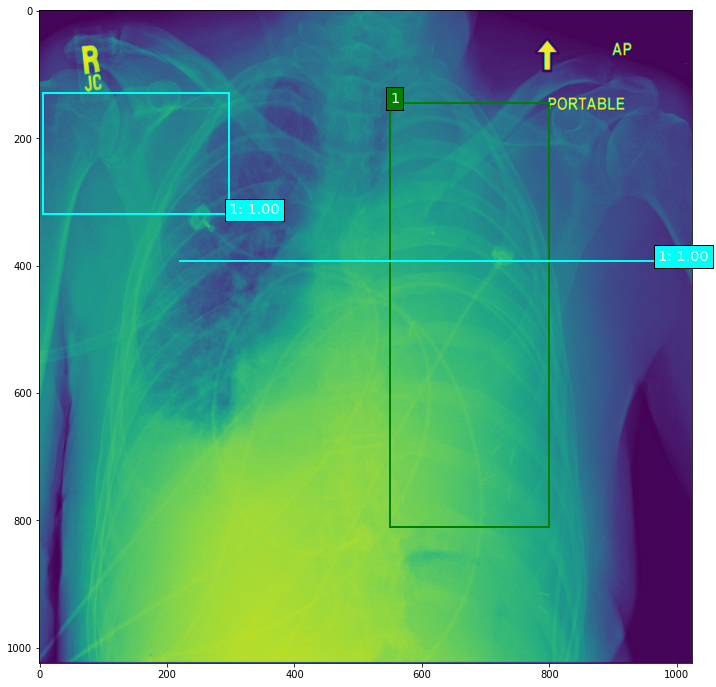

In [ ]:
# 5: Draw the predicted boxes onto the image

# Set the colors for the bounding boxes
colors = plt.cm.hsv(np.linspace(0, 1, n_classes+1)).tolist()
classes = ['0', '1']

plt.figure(figsize=(20,12))
plt.imshow(batch_original_images[i])

current_axis = plt.gca()

for box in batch_original_labels[i]:
    xmin = box[1]
    ymin = box[2]
    xmax = box[3]
    ymax = box[4]
    label = '{}'.format(classes[int(box[0])])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='green', fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':'green', 'alpha':1.0})

for box in y_pred_decoded_inv[i]:
    xmin = box[2]
    ymin = box[3]
    xmax = box[4]
    ymax = box[5]
    color = colors[int(box[0])]
    label = '{}: {:.2f}'.format(classes[int(box[0])], box[1])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})

Inference

In [ ]:
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
from keras.optimizers import Adam
from imageio import imread
import numpy as np
from matplotlib import pyplot as plt

from models.keras_ssd300 import ssd_300
from keras_loss_function.keras_ssd_loss import SSDLoss
from keras_layers.keras_layer_AnchorBoxes import AnchorBoxes
from keras_layers.keras_layer_DecodeDetections import DecodeDetections
from keras_layers.keras_layer_DecodeDetectionsFast import DecodeDetectionsFast
from keras_layers.keras_layer_L2Normalization import L2Normalization

from ssd_encoder_decoder.ssd_output_decoder import decode_detections, decode_detections_fast

from data_generator.object_detection_2d_data_generator import DataGenerator
from data_generator.object_detection_2d_photometric_ops import ConvertTo3Channels
from data_generator.object_detection_2d_geometric_ops import Resize
from data_generator.object_detection_2d_misc_utils import apply_inverse_transforms

%matplotlib inline

In [ ]:
# Set the image size.
img_height = 300
img_width = 300

In [ ]:
%pwd
os.chdir('/content/drive/MyDrive/RSNA_PneumoniaDetectionChallenge/')

In [ ]:
# TODO: Set the path to the `.h5` file of the model to be loaded.
model_path ='ssd300_pneumonia_epoch-04_loss-6.0405.h5'

# We need to create an SSDLoss object in order to pass that to the model loader.
ssd_loss = SSDLoss(neg_pos_ratio=3, n_neg_min=0, alpha=1.0)

K.clear_session() # Clear previous models from memory.

model = load_model(model_path, custom_objects={'AnchorBoxes': AnchorBoxes,
                                               'L2Normalization': L2Normalization,
                                               'DecodeDetections': DecodeDetections,
                                               'compute_loss': ssd_loss.compute_loss})

tracking <tf.Variable 'conv4_3_norm/conv4_3_norm_gamma:0' shape=(512,) dtype=float32> gamma


In [ ]:
def predictions_file(img_path, output_file):        
        orig_images = [] # Store the images here.
        input_images = [] # Store resized versions of the images here.

        orig_images.append(imread(img_path))
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img = image.img_to_array(img) 
        input_images.append(img)
        input_images = np.array(input_images)

        y_pred = model.predict(input_images)

        y_pred_decoded = decode_detections(y_pred,
                                          confidence_thresh=0.5,
                                          iou_threshold=0.8,
                                          top_k=2,
                                          input_coords = 'minmax',
                                          normalize_coords=True,
                                          img_height=img_height,
                                          img_width=img_width)
        boxes = ''
        for box in y_pred_decoded[0]:
            conf = box[1]
            xmin = box[2] 
            ymin = box[3]
            xmax = box[4]
            ymax = box[5]
            boxes = str(boxes) + ' ' + str(conf) + ' ' + str(xmin) + ' ' + str(ymin) + ' ' + str(xmax) + ' ' + str(ymax) 

        out_str = img_path.replace('.png','') + ',' + boxes
      
        with open(output_file, 'a') as outputfile:
          outputfile.write(out_str+"\n") 

        outputfile.close()

In [ ]:
os.chdir('/content/drive/MyDrive/RSNA_PneumoniaDetectionChallenge/PNG_Test/')
test_files = os.listdir()

i=0
for imgfile in test_files:
    print(i,imgfile)
    predictions_file(imgfile, 'ssd300_submissionsfile_conf50_iou80.csv')
    i=i+1

NameError: ignored